In [1]:
import tensorflow
tensorflow.__version__

'1.3.0'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.6'

#### Import the required modules and set the seed to repeat the analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
#from keras.optimizers import RMSProp
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

#### cifar_10 dataset consists of 60000 images of 32x32 pixels on 3 channels

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# Size of the batch
batch_size = 32
# Number of classes of images
nb_classes = 10
# Number of epochs for learning
num_epochs = 25
# Size of the images
img_rows, img_cols = 32, 32
# Number of channels in the image: RGB
img_channels = 3

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
# Visualize some samples in the training datasets

def sample(X_train, y_train, classes, samples_per_class=6):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)    # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):         # plot the image one by one
            plt_idx = i * num_classes + y + 1  # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

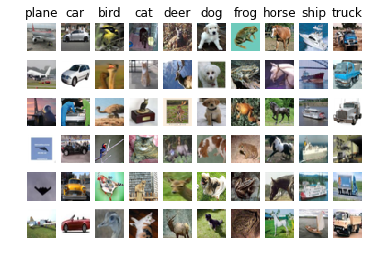

In [7]:
sample(X_train, y_train, classes)

#### Normalize the data and convert the labels to categories

In [8]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert the labels to categories
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
import numpy as np

train_x = np.array([X_train[idx].flatten() for idx in range(len(X_train))], ndmin=2)
train_x.shape

(50000, 3072)

In [11]:
test_x = np.array([X_test[idx].flatten() for idx in range(len(X_test))], ndmin=2)
test_x.shape

(10000, 3072)

In [12]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [13]:
y_train.shape

(50000,)

In [14]:
y_test.shape

(10000,)

In [15]:
# Implementation of the KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = KNeighborsClassifier()
knn = clf.fit(train_x,y_train)
print("Classification is Done.")

Classification is Done.


In [16]:
output_Predicted = knn.predict(train_x);
accuracy_train = metrics.accuracy_score(output_Predicted,y_train)
print("Accuracy on the train dataset:")
print(accuracy_train* 100)

output_predicted_validation = clf.predict(test_x)
accuracy_test = metrics.accuracy_score(output_predicted_validation,y_test)
print("Accuracy on the test dataset is:")
print(accuracy_test * 100)

Accuracy on the train dataset:
50.534
Accuracy on the test dataset is:
33.98


In [17]:
y_pred = y_test
pred_knn = output_predicted_validation

In [19]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_pred, pred_knn)
conf_mx

array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]])

<IPython.core.display.Javascript object>


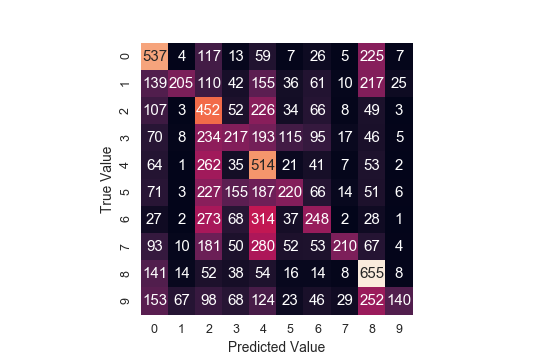

In [22]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(conf_mx, square=True, annot=True, fmt = 'd', cbar= False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()